In [1]:
# redes de multiplas camadas

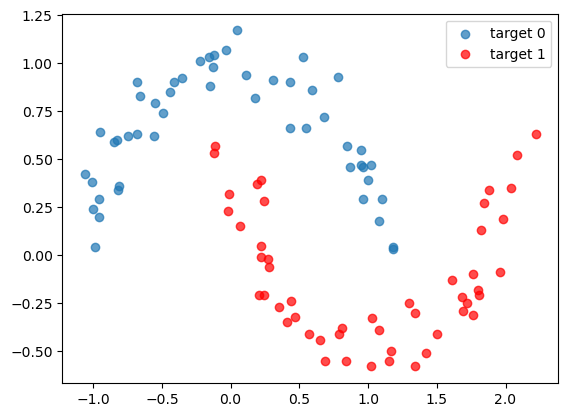

In [45]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
import torch.nn.functional as F
import util 

# dados tem 2 variaveis independentes de entrada
data = torch.from_numpy(np.loadtxt('../data/moon_data.txt')).to(torch.float32)

# dados estao no formato n linhas de dados x 3 colunas (2 inicias input e a final target)
inputs = data[:, :2]
targets = data[:, 2]

# plota duas classes diferentes
plt.scatter(inputs[targets==0, 0], inputs[targets==0, 1], alpha=0.7) # imprime pontos (x1, x2) em que target = 0
plt.scatter(inputs[targets==1, 0], inputs[targets==1, 1], alpha=0.7, c='r') # imprime pontos (x1, x2) em que target = 1
plt.legend(('target 0', 'target 1'))


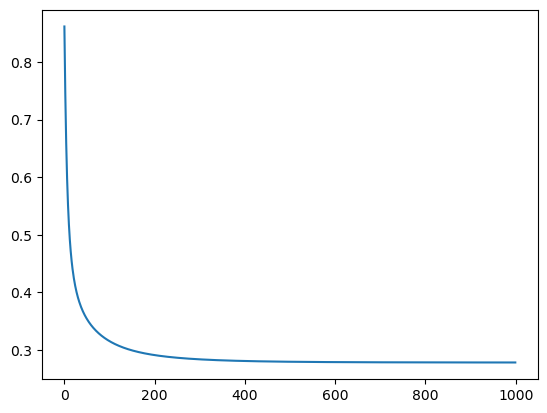

In [46]:
# treinamento de um modelo linear

def train(model, inputs, targets, num_epochs, lr, loss_func):

    # x1 e x2
    inputs = inputs.reshape(len(inputs), 2)
    targets = targets.reshape(len(targets), 1)

    losses = []
    # SGD = Stochastic Gradient Descent
    optim = torch.optim.SGD(model.parameters(), lr=lr)
    for _ in range(num_epochs):
        optim.zero_grad()
        scores = model(inputs)
        loss = loss_func(scores, targets)
        loss.backward()
        optim.step()
        losses.append(loss.item())

    return losses

# Binary Cross Entropy (verossimilhanca, probs_correct) com log
loss_func = nn.BCEWithLogitsLoss()
model = nn.Linear(in_features=2, out_features=1)
losses = train(model, inputs, targets, num_epochs=1000, lr=0.5, loss_func=loss_func)
plt.plot(losses)


modelo linear tem capacidade de separar dados de forma linear apenas

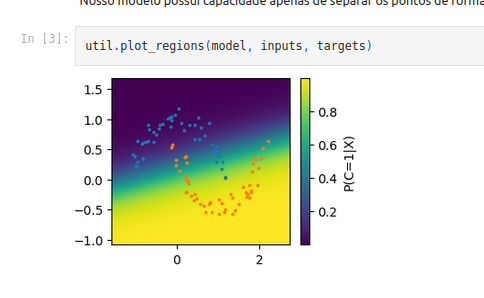

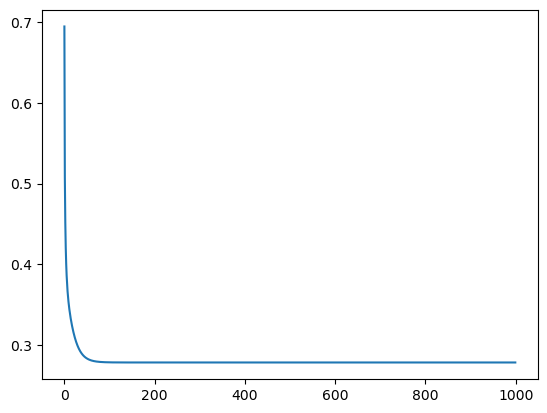

In [51]:
# pode-se entao pensar que fazer modelo com duas camadas lineares aumenta capacidade de entedimento do modelo sob dados

# maneira de sobreescrever modulos de modelo 
class Model(nn.Module):

    def __init__(self):
        super().__init__()
        # colocar camada de entrada com mais saidas refina modelo
        # aumenta custo do modelo e pode gerar ma generalizacao (overfit)
        # camadas mais baixas sao avaliacoes de mais baixo nivel
        # camadas mais acima sao camadas com avaliacoes mais gerais
        self.layer1 = nn.Linear(in_features=2, out_features=16)
        self.layer2 = nn.Linear(in_features=16, out_features=1)

    # usado no lugar de __call__, chama o __call__ da funcao pai nn.Module
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)

        return x
    
model = Model()

losses = train(model, inputs, targets, 1000, 0.5, loss_func)

plt.plot(losses)

nao importa numero de camadas lineares, divisao dos pontos que o modelo faz continua sendo linear

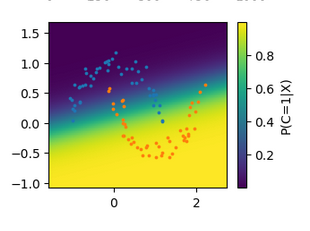

com duas camadas, o que esta acontecendo eh


  [100, 16]    = [100, 2] * [2, 16]  + [16] 

saida_camada_1 =    X    *    W     +    b 

16 eh o out_features definido, ele determina a quantidade de saida da camada 1

uma possível solução para isso é adicionar uma ativação não linear entre as camadas

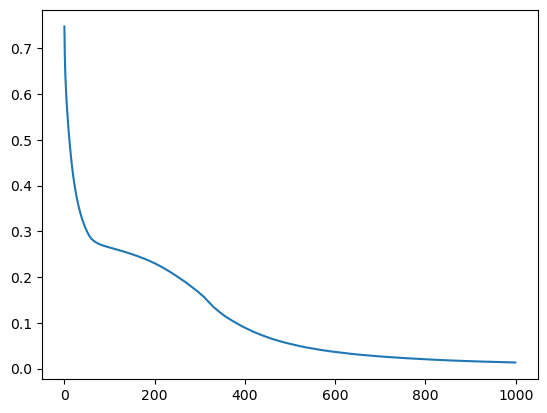

In [52]:
class Model(nn.Module):

    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=16)
        self.act = nn.ReLU()
        self.layer2 = nn.Linear(in_features=16, out_features=1)

    # usado no lugar de __call__, chama o __call__ da funcao pai nn.Module
    def forward(self, x):
        x = self.layer1(x)
        x = self.act(x)
        x = self.layer2(x)

        return x
    
model = Model()

losses = train(model, inputs, targets, 1000, 0.5, loss_func)

Replt.plot(losses)

ReLu é dito um retificador em que y = 0 se x < e y = x se x > 0

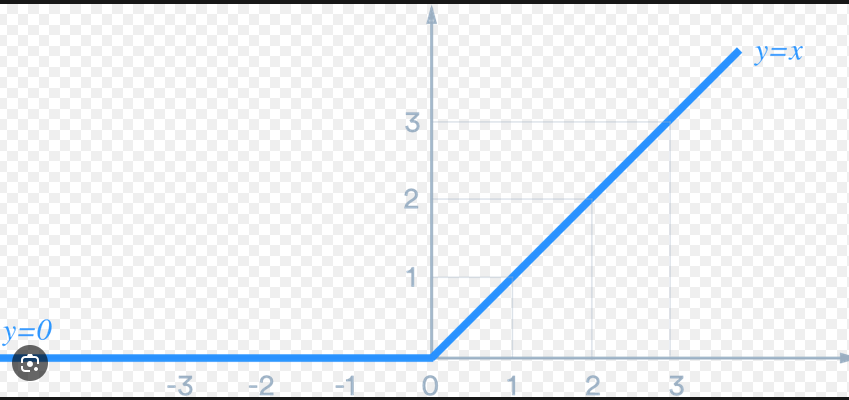

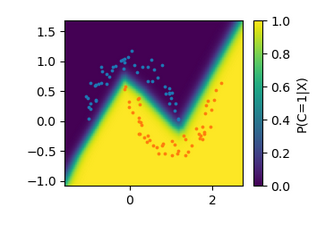